## CSE291 HW4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import scipy
from pylab import rcParams
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
np.random.seed(1104)
predicates = np.loadtxt('predicate-matrix-continuous.txt')
animals = np.loadtxt('classes.txt', dtype = 'str')[:, 1]
predicates

array([[-1.  , -1.  , -1.  , ...,  2.35,  9.7 ,  8.38],
       [39.25,  1.39,  0.  , ..., 58.64, 20.14, 11.39],
       [83.4 , 64.79,  0.  , ..., 15.77, 13.41, 15.42],
       ...,
       [63.57, 43.1 ,  0.  , ..., 35.95, 28.26,  5.  ],
       [55.31, 55.46,  0.  , ...,  5.04, 18.89, 72.99],
       [10.22, 21.53, 27.73, ...,  3.96, 14.05, 37.98]])

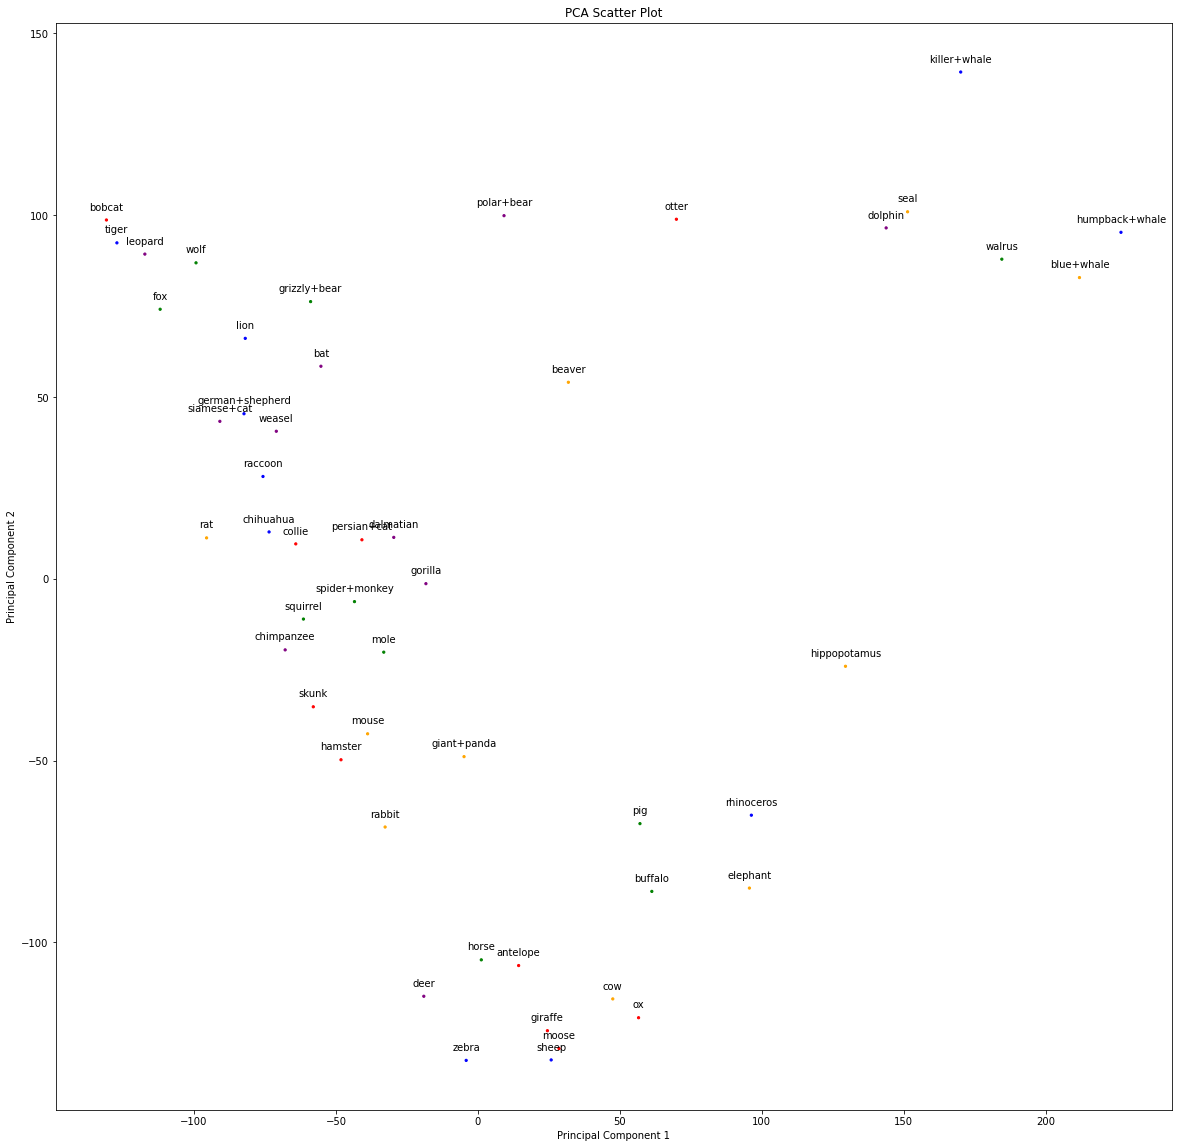

In [3]:
pca = PCA(n_components=2)
pca.fit(predicates)
transformed = pca.transform(predicates)
rcParams['figure.figsize'] = 20,20
colors = ['red', 'green', 'blue', 'orange', 'purple']
colors = [colors[i%5] for i in range(len(transformed))]
plt.scatter(transformed[:, 0], transformed[:, 1], s=5,c=colors)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot')
for i, label in enumerate(animals):
    plt.annotate(label, (transformed[:, 0][i], transformed[:, 1][i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()

In [4]:
def getFigures(theTransformedArray,perplexity):
    rcParams['figure.figsize'] = 20,20
    colors = ['red', 'green', 'blue', 'orange', 'purple']
    colors = [colors[i%5] for i in range(len(theTransformedArray))]
    plt.scatter(theTransformedArray[:, 0], theTransformedArray[:, 1], s=5,c=colors)
    plt.xlabel('TSNE Component 1')
    plt.ylabel('TSNE Component 2')
    plt.title('TSNE Scatter Plot with Perplexity = {}'.format(perplexity))
    for i, label in enumerate(animals):
        plt.annotate(label, (theTransformedArray[i][0], theTransformedArray[i][1]), 
                     textcoords="offset points", xytext=(0, 10), ha='center')

    plt.show()

In [5]:
from sklearn.manifold import TSNE
Z = TSNE(n_components=2, perplexity=10.0).fit_transform(predicates)
Z

array([[ 4.23630714e+01, -1.06522774e+02],
       [-1.24546585e+02,  9.12171783e+01],
       [ 1.12208488e+02,  7.60134201e+01],
       [ 5.04211845e+01,  7.13666611e+01],
       [-6.72778473e+01,  8.87574310e+01],
       [-5.27503471e+01,  4.09649658e+01],
       [ 6.71104355e+01, -9.92286377e+01],
       [-9.33370819e+01,  6.73102112e+01],
       [ 1.26584908e+02,  5.78591156e+01],
       [-6.89619751e+01,  4.79043045e+01],
       [-5.28704948e+01, -3.20122576e+00],
       [-9.88473511e+01, -2.26017323e+01],
       [-1.70222839e+02,  6.37803612e+01],
       [ 1.02078789e+02, -1.83318653e+01],
       [-1.52390213e+02,  5.51973000e+01],
       [ 1.17887505e+02, -8.19837952e+01],
       [-3.79082451e+01, -7.32223969e+01],
       [ 1.12000381e+02,  5.42657433e+01],
       [ 8.49601212e+01, -2.80779991e+01],
       [-1.68484764e+01, -6.78641357e+01],
       [ 9.68777542e+01, -7.19111023e+01],
       [-1.15239006e+02,  4.46380272e+01],
       [ 9.37096405e+01, -9.82254715e+01],
       [ 8.

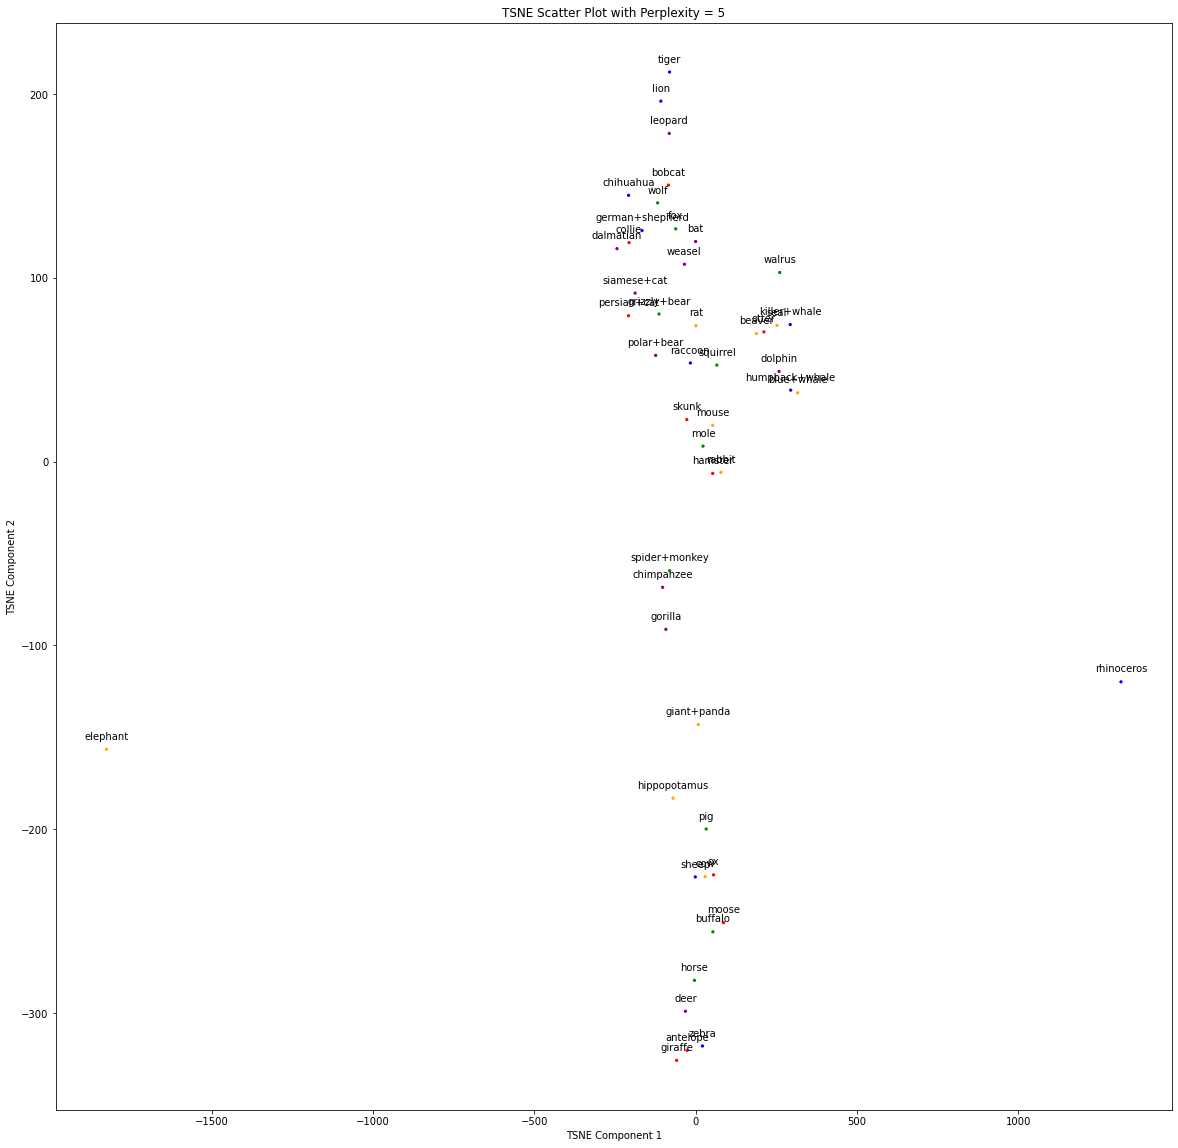

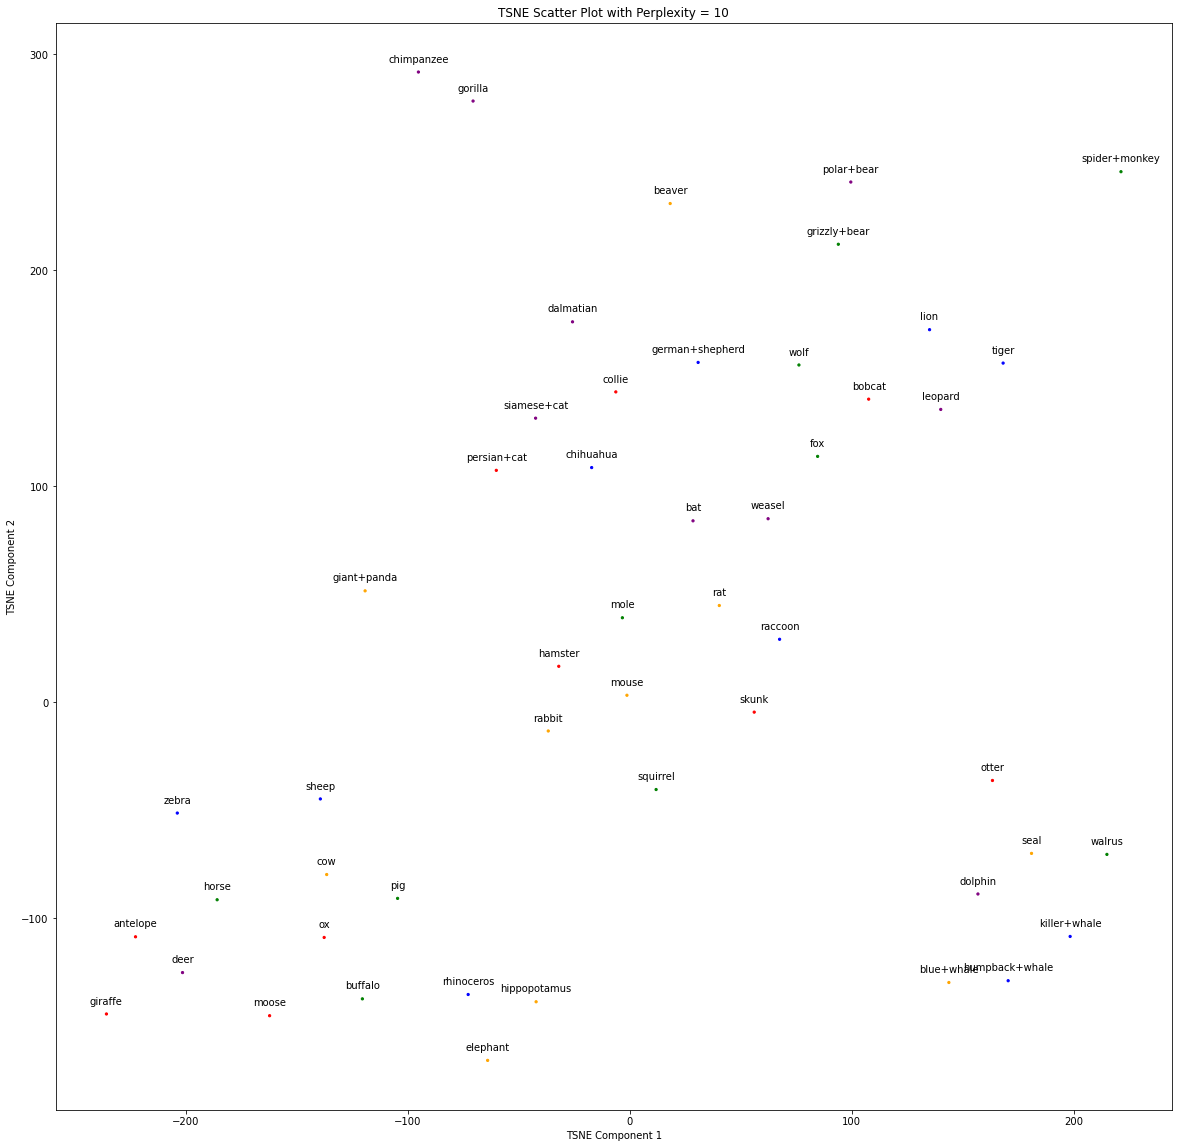

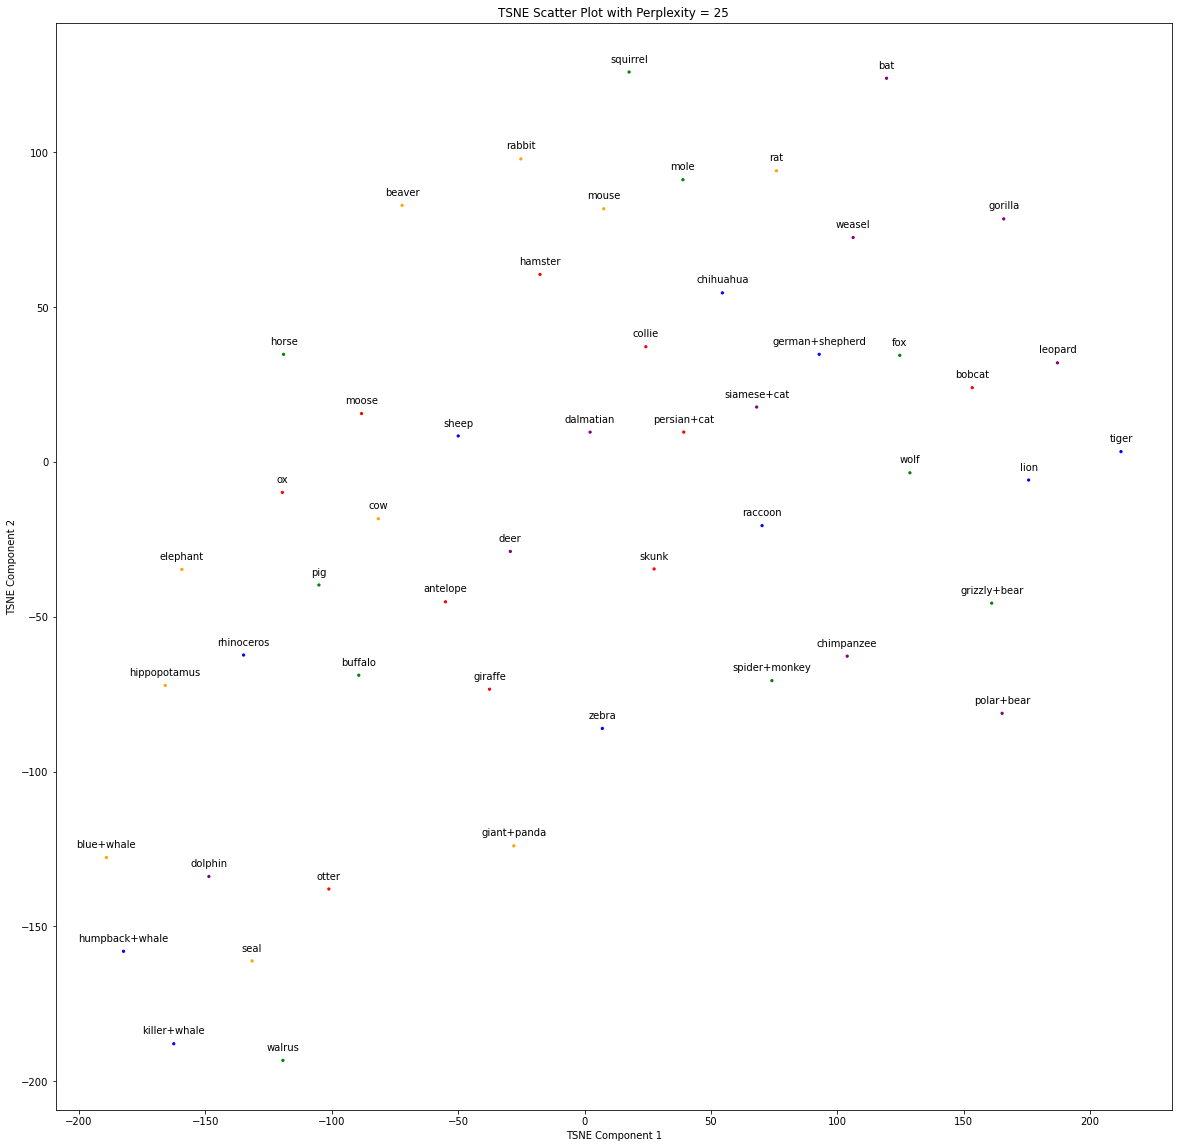

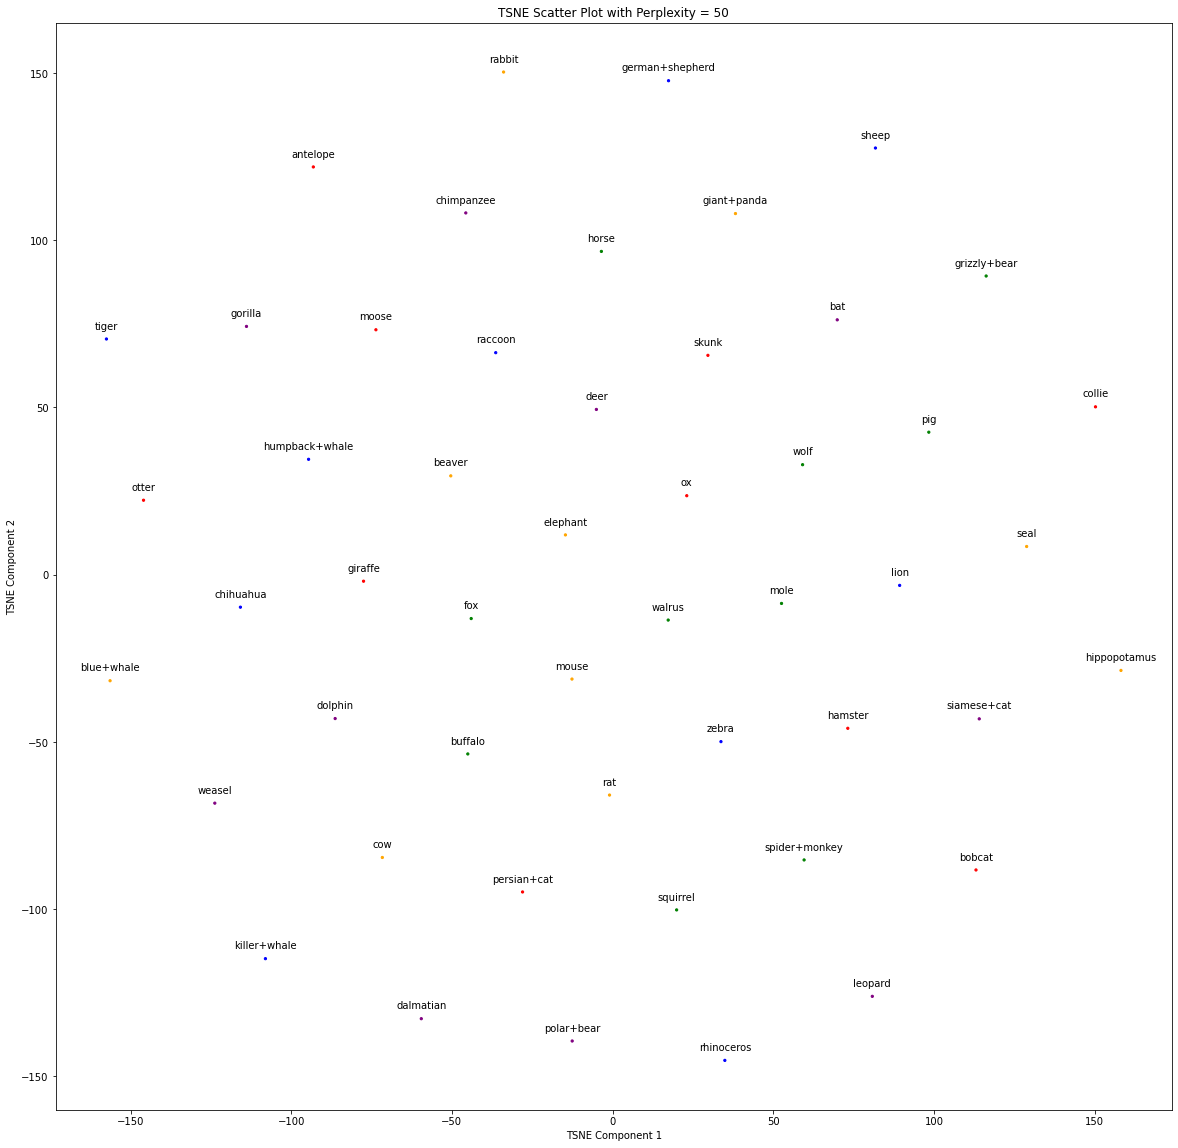

In [6]:
Z_list=[]
for perplexity in [5,10,25,50]:
    Z = TSNE(n_components=2, perplexity=perplexity).fit_transform(predicates)
    Z_list.append(Z)
    getFigures(Z,perplexity)

In [7]:
def getDistanceList(aList):
    theDistanceList=[]
    for i in range(len(aList)-1):
        for j in range(i+1,len(aList)):
            theDistanceList.append(np.linalg.norm(aList[i] - aList[j]))
            
    return theDistanceList




def getDIstortionForTSNE(D,Z_list):
    for perplexity,Z in zip([5,10,25,50],Z_list):
        D_hat_TSNE = getDistanceList(Z)
        c2 = (sum(D)/len(D))/(sum(D_hat_TSNE)/len(D_hat_TSNE))
        delta_TSNE = [max(c2*j/i,i/(c1*j)) for i,j in zip(D,D_hat_TSNE)]
        print("distortion of TSNE with perplexity {} is {}".format(perplexity,sum(delta_TSNE)/len(delta_TSNE)))
        
D = getDistanceList(predicates)
D_hat_PCA = getDistanceList(transformed)

c1 = (sum(D)/len(D))/(sum(D_hat_PCA)/len(D_hat_PCA))


delta_PCA = [max(c1*j/i,i/(c1*j)) for i,j in zip(D,D_hat_PCA)]

print("distortion of PCA is {}".format(sum(delta_PCA)/len(delta_PCA)))
getDIstortionForTSNE(D,Z_list)

distortion of PCA is 1.8313495400958386
distortion of TSNE with perplexity 5 is 1.3349521969171132
distortion of TSNE with perplexity 10 is 1.2734444709416424
distortion of TSNE with perplexity 25 is 1.3964359251993639
distortion of TSNE with perplexity 50 is 1.6808162438567222
